<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="400">

# **Universidad San Sebastián - Magister Data Science**

### Mauricio Pérez
### Pablo Loaiza


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Ruta al archivo CSV en Google Drive para problema de Stroke

In [2]:
df = pd.read_excel("../data/raw/cancer_hbv.xlsx", engine='openpyxl')


In [3]:
# Mostramos un resumen estadístico básico del dataset
print("Descripción del dataset:")
print(df.describe().T)

Descripción del dataset:
                               count                           mean  \
IDPACIENTE                    7674.0                   25578.002867   
IDTUMOR                       7674.0                   23921.400834   
COD_RELIGION                  7662.0                      11.509397   
COD_ETNIA                     7666.0                       0.803939   
COD_ZONA                      7640.0                       1.242801   
COD_COMUNA                    7674.0                   12373.963253   
COD_REGION                    7674.0                      12.234037   
COD_SSREFERENCIA              7670.0                      23.277184   
COD_ACT_LABORAL               7672.0                      81.106361   
COD_ACT_EMPRESA               7666.0                       9.176624   
COD_SIT_LABORAL               7614.0                       6.277515   
ANHOSESTUDIO                   798.0                       10.73183   
COD_ULT_CURSO                 7643.0                

In [4]:
# Listamos todas las columnas
print("\nLista de columnas:")
columnas = df.columns.tolist()
for columna in columnas:
    print(columna)


Lista de columnas:
IDPACIENTE
IDTUMOR
SEXO
FEC_NACIMIENTO
EDAD
PREVISION
COD_RELIGION
RELIGION
COD_ETNIA
ETNIA
ETNIA_APELLIDO
DIRECCION
NUM_DOMICILIO
DEPTO_DOMICILIO
LOCALIDAD_DOMICILIO
COD_ZONA
ZONA_VIVIENDA
COD_COMUNA
COMUNA
COD_REGION
REGION
COD_SSREFERENCIA
SSREFERENCIA
COD_RECINTO_PROCEDE
RECINTO_PROCEDE
COD_ESTABLE_DESTINO
ESTABLE_DESTINO
COD_ACT_LABORAL
ACT_LABORAL
COD_ACT_EMPRESA
ACT_EMPRESA
COD_SIT_LABORAL
SITUACION_LABORAL
ANHOSESTUDIO
COD_ULT_CURSO
ULT_CURSO_APROBADO
CANCER_PREVIO_1
FECHA_CANCER_PREVIO_1
CANCER_PREVIO_2
FECHA_CANCER_PREVIO_2
PARENTESCO_1
CANCER_PARENTESCO_1
PARENTESCO_2
CANCER_PARENTESCO_2
PARENTESCO3
CANCER_PARENTESCO3
ID_COMITE
DESCRIPCION_COMITE
FECHA_COMITE
FEC_INGRESO_CASO
FEC_DIAGNO
INTERVALO_INGRESO_DIAGNO
FEC_TOM_MUESTRA
TIPO_TUMOR
COD_TOPOLOGIA
NOM_TOPOLOGIA
COD_DET_TOPOLOGIA
NOM_DETALLE_TOPO
COD_CIE10
COD_MORFO
MORFO_COMPLETA
COD_COMPORTAMIENTO
NOM_COMPORTAMIENTO
COD_EXTENSION
EXTENSION_NOM
COD_LATERALIDAD
LATERALIDAD_NOM
COD_GRADO
GRADO_DIFERENCI

In [5]:
col_drop_file = '../data/raw/columnas_drop'

# Leer el archivo con las columnas a eliminar
with open(col_drop_file, 'r') as file:
    columnas_a_eliminar = [line.strip() for line in file.readlines()]

#  Eliminar las columnas especificadas
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

print(df.head())

   IDPACIENTE  IDTUMOR SEXO FEC_NACIMIENTO      PREVISION     RELIGION  \
0       26612    23674    F     16/03/1954       FONASA B  NO RESPONDE   
1       25816    23228    F     10/09/1973       FONASA A  NO RESPONDE   
2       21455    19567    M     29/06/1951  SIN PREVISION  NO RESPONDE   
3       26224    23450    F     06/02/1967       FONASA A  NO RESPONDE   
4       19999    18179    M     06/01/1940       FONASA B  NO RESPONDE   

                  ETNIA ZONA_VIVIENDA        COMUNA  \
0  Ninguna, No responde        Urbano        Temuco   
1  Ninguna, No responde        Urbano         Aisen   
2  Ninguna, No responde        Urbano      Valdivia   
3  Ninguna, No responde         Rural  Puerto Montt   
4  Ninguna, No responde         Rural      La Union   

                                   REGION  ...  \
0                  REGION DE LA ARAUCANIA  ...   
1  REGION AYSEN DEL GENERAL CARLOS IBAÑES  ...   
2                      REGION DE LOS RIOS  ...   
3                     RE

In [6]:
# Filtramos el DataFrame para obtener solo las filas donde 'NOM_TOPOLOGIA' es igual a 'Prostata'
df = df[df['NOM_TOPOLOGIA'] == 'Prostata']

In [7]:
# Guardar el DataFrame filtrado especificando el delimitador, sin índice y con codificación UTF-8
df.to_csv('../data/processed/df_cancer_prostata.csv', index=False, encoding='utf-8')

In [8]:
print(df.shape)
# Mostrar las primeras filas del conjunto de datos
print("---> Mostrar las primeras filas del conjunto de datos <---")
df.head()

(994, 120)
---> Mostrar las primeras filas del conjunto de datos <---


,IDPACIENTE,IDTUMOR,SEXO,FEC_NACIMIENTO,PREVISION,RELIGION,ETNIA,ZONA_VIVIENDA,COMUNA,REGION,...,OBSERVACION_TRATAMIENTO_1,OBSERVACION_TRATAMIENTO_2,OBSERVACION_TRATAMIENTO_3,OBSERVACION_TRATAMIENTO_4,OBSERVACION_TRATAMIENTO_5,OBSERVACION_TRATAMIENTO_6,OBSERVACION_TRATAMIENTO_7,OBSERVACION_TRATAMIENTO_8,OBSERVACION_TRATAMIENTO_9,OBSERVACION_TRATAMIENTO_10
4,19999,18179,M,06/01/1940,FONASA B,NO RESPONDE,"Ninguna, No responde",Rural,La Union,REGION DE LOS RIOS,...,TTO OTRO CENTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,22716,20825,M,29/01/1943,FONASA A,NO RESPONDE,"Ninguna, No responde",Urbano,Cochamo,REGION DE LOS LAGOS,...,RADIOTERAPIA EXTERNA CONFORMACIONAL TÉCNICA DE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,20621,18713,M,23/05/1965,FONASA A,NO RESPONDE,"Ninguna, No responde",Urbano,Valdivia,REGION DE LOS RIOS,...,PRR+LIO,GOSERELINA,"RADIACIóN IONIZANTE, CURATIVO, TéCNICA CONFORM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,19805,18013,M,15/01/1952,FONASA D,NO RESPONDE,"Ninguna, No responde",Rural,Panguipulli,REGION DE LOS RIOS,...,PROSTATECTOMIA RADICAL RETROPUBICA + LINFADENE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,18421,16920,M,08/01/1948,FONASA B,NO RESPONDE,Sin Informacion,Urbano,Valdivia,REGION DE LOS RIOS,...,GOSERELINA,"RT 3D, DOSIMETRíA POR TAC, DOSIS: 78",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 4 to 7670
Columns: 120 entries, IDPACIENTE to OBSERVACION_TRATAMIENTO_10
dtypes: datetime64[ns](19), float64(1), int64(3), object(97)
memory usage: 939.6+ KB


In [10]:
# Resumen estadístico de los datos
print("--- Resumen estadístico de los datos ---")
df.describe().T

--- Resumen estadístico de los datos ---


,count,mean,min,25%,50%,75%,max,std
IDPACIENTE,994.0,27511.618712,1646.0,23707.0,27429.5,31891.75,37144.0,5570.854127
IDTUMOR,994.0,25065.791751,16920.0,22035.0,24763.0,27519.25,33121.0,3740.691546
INTERVALO_INGRESO_DIAGNO,994.0,-109.555332,-1607.0,-193.25,-88.0,24.0,3291.0,305.486585
COD_TOPOLOGIA,994.0,61.0,61.0,61.0,61.0,61.0,61.0,0.0
FECHA_INICIO_TRATAMIENTO_2,215,2021-02-26 02:47:26.511628032,2019-01-31 00:00:00,2020-03-18 00:00:00,2021-01-06 00:00:00,2021-12-29 00:00:00,2024-02-05 00:00:00,NaN
FECHA_INICIO_TRATAMIENTO_3,59,2021-08-11 02:50:50.847457536,2019-07-18 00:00:00,2020-10-05 00:00:00,2021-08-17 00:00:00,2022-05-28 12:00:00,2023-10-02 00:00:00,NaN
FECHA_INICIO_TRATAMIENTO_4,18,2022-03-20 22:40:00,2020-07-03 00:00:00,2021-03-03 12:00:00,2022-03-13 00:00:00,2023-02-21 00:00:00,2023-11-13 00:00:00,NaN
FECHA_INICIO_TRATAMIENTO_5,6,2022-06-09 12:00:00,2021-01-06 00:00:00,2022-01-05 06:00:00,2022-06-13 12:00:00,2023-02-01 06:00:00,2023-07-20 00:00:00,NaN
FECHA_INICIO_TRATAMIENTO_6,3,2023-07-30 08:00:00,2022-11-03 00:00:00,2023-04-23 00:00:00,2023-10-11 00:00:00,2023-12-12 00:00:00,2024-02-12 00:00:00,NaN
FECHA_INICIO_TRATAMIENTO_7,1,2024-03-04 00:00:00,2024-03-04 00:00:00,2024-03-04 00:00:00,2024-03-04 00:00:00,2024-03-04 00:00:00,2024-03-04 00:00:00,NaN


In [27]:
df = pd.read_csv("../data/processed/df_cancer_prostata.csv")


In [28]:
# Identificar las columnas que potencialmente contienen fechas por su nombre
columnas_fecha = [col for col in df.columns if 'FEC' in col or 'FECHA' in col]

# Convertir las columnas identificadas a datetime
for col in columnas_fecha:
    print(col)

FEC_NACIMIENTO
FECHA_CANCER_PREVIO_1
FECHA_CANCER_PREVIO_2
FECHA_COMITE
FEC_INGRESO_CASO
FEC_DIAGNO
FEC_TOM_MUESTRA
FECHA_FALLECIMIENTO
FECHA_INICIO_TRATAMIENTO_1
FECHA_INICIO_TRATAMIENTO_2
FECHA_INICIO_TRATAMIENTO_3
FECHA_INICIO_TRATAMIENTO_4
FECHA_INICIO_TRATAMIENTO_5
FECHA_INICIO_TRATAMIENTO_6
FECHA_INICIO_TRATAMIENTO_7
FECHA_INICIO_TRATAMIENTO_8
FECHA_INICIO_TRATAMIENTO_9
FECHA_INICIO_TRATAMIENTO_10
FECHA_TERMINO_TRATAMIENTO_1
FECHA_TERMINO_TRATAMIENTO_2
FECHA_TERMINO_TRATAMIENTO_3
FECHA_TERMINO_TRATAMIENTO_4
FECHA_TERMINO_TRATAMIENTO_5
FECHA_TERMINO_TRATAMIENTO_6
FECHA_TERMINO_TRATAMIENTO_7
FECHA_TERMINO_TRATAMIENTO_8
FECHA_TERMINO_TRATAMIENTO_9
FECHA_TERMINO_TRATAMIENTO_10


In [29]:
# Reemplazar 'S/A' por NaN en la columna 'FECHA_COMITE'
df['FECHA_COMITE'] = df['FECHA_COMITE'].replace('S/A', np.nan)

df['FEC_NACIMIENTO'] = pd.to_datetime(df['FEC_NACIMIENTO'], format='%d/%m/%Y',errors='coerce')
df['FECHA_CANCER_PREVIO_1'] = pd.to_datetime(df['FECHA_CANCER_PREVIO_1'], format='%Y',errors='coerce')
df['FECHA_CANCER_PREVIO_2'] = pd.to_datetime(df['FECHA_CANCER_PREVIO_2'], format='%Y',errors='coerce')
df['FECHA_COMITE'] = pd.to_datetime(df['FECHA_COMITE'], format='%d/%m/%Y',errors='coerce')
df['FEC_INGRESO_CASO'] = pd.to_datetime(df['FEC_INGRESO_CASO'], format='%d/%m/%Y',errors='coerce')
df['FEC_DIAGNO'] = pd.to_datetime(df['FEC_DIAGNO'],format='%d/%m/%Y')
df['FEC_TOM_MUESTRA'] = pd.to_datetime(df['FEC_TOM_MUESTRA'], format='%d/%m/%Y',errors='coerce')
df['FECHA_FALLECIMIENTO'] = pd.to_datetime(df['FECHA_FALLECIMIENTO'], format='%d/%m/%Y',errors='coerce')

In [30]:
# Columnas Fecha de Tratamiento tienen formato distinto. 
columnas_fecha_tratamiento = [col for col in df.columns if 'FECHA_INICIO_TRATAMIENTO' in col or 'FECHA_TERMINO_TRATAMIENTO' in col]

# Convertir las columnas identificadas a datetime
for col in columnas_fecha_tratamiento:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [31]:
# Verificar los tipos de datos para confirmar la conversión
df[columnas_fecha].dtypes

FEC_NACIMIENTO                  datetime64[ns]
FECHA_CANCER_PREVIO_1           datetime64[ns]
FECHA_CANCER_PREVIO_2           datetime64[ns]
FECHA_COMITE                    datetime64[ns]
FEC_INGRESO_CASO                datetime64[ns]
FEC_DIAGNO                      datetime64[ns]
FEC_TOM_MUESTRA                 datetime64[ns]
FECHA_FALLECIMIENTO             datetime64[ns]
FECHA_INICIO_TRATAMIENTO_1      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_2      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_3      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_4      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_5      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_6      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_7      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_8      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_9      datetime64[ns]
FECHA_INICIO_TRATAMIENTO_10     datetime64[ns]
FECHA_TERMINO_TRATAMIENTO_1     datetime64[ns]
FECHA_TERMINO_TRATAMIENTO_2     datetime64[ns]
FECHA_TERMINO_TRATAMIENTO_3     datetime64[ns]
FECHA_TERMINO

In [32]:
nulos_fec_diagn = df['FEC_DIAGNO'].isnull().sum()
nulos_fec_diagn

0

In [33]:
nulos_fec_trat = df['FECHA_INICIO_TRATAMIENTO_1'].isnull().sum()
nulos_fec_trat

97

In [34]:
# Eliminar filas donde 'FECHA_INICIO_TRATAMIENTO_1' es nula (No se realizaron tratamientos a estos pacientes)
df = df.dropna(subset=['FECHA_INICIO_TRATAMIENTO_1'])
df[['IDPACIENTE', 'FEC_DIAGNO','TIPO_TERAPIA_1', 'FECHA_INICIO_TRATAMIENTO_1']]

,IDPACIENTE,FEC_DIAGNO,TIPO_TERAPIA_1,FECHA_INICIO_TRATAMIENTO_1
1,22716,2019-01-02,Teleterapia,2019-09-23
2,20621,2019-01-02,Cirugia,2019-04-05
3,19805,2019-01-03,Cirugia,2019-06-27
4,18421,2019-01-04,Hormonoterapia,2019-02-14
5,21327,2019-01-04,Hormonoterapia,2019-01-07
...,...,...,...,...
989,30295,2021-12-22,Hormonoterapia,2022-10-20
990,33646,2021-12-23,Teleterapia,2022-12-03
991,29274,2021-12-30,Hormonoterapia,2022-06-08
992,32914,2021-12-30,Hormonoterapia,2022-01-08


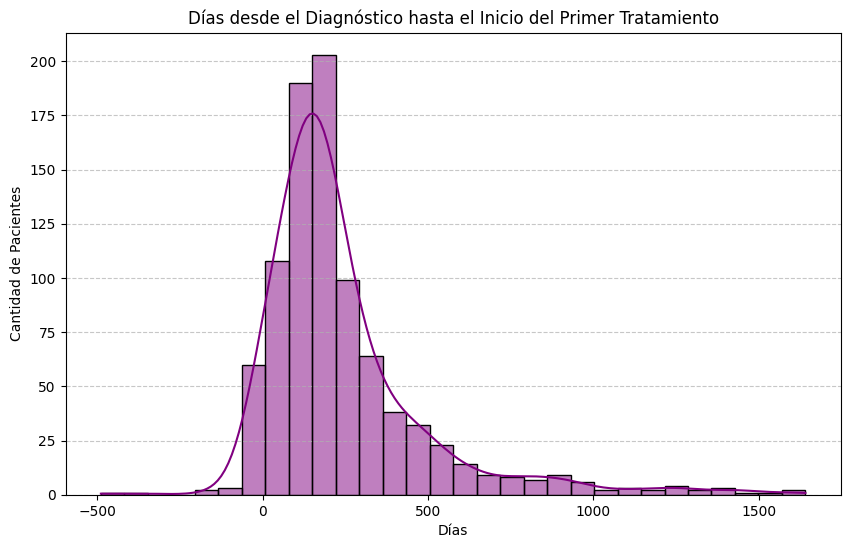

count     897.000000
mean      242.694537
std       250.439472
min      -489.000000
25%       106.000000
50%       175.000000
75%       293.000000
max      1641.000000
Name: DIAS_HASTA_INICIO_TRATAMIENTO, dtype: float64

In [35]:
# Cálculo de la diferencia en días entre la fecha de diagnóstico y la fecha de inicio del primer tratamiento
df['DIAS_HASTA_INICIO_TRATAMIENTO'] = (df['FECHA_INICIO_TRATAMIENTO_1'] - df['FEC_DIAGNO']).dt.days

# Visualización de la distribución de los días hasta el inicio del tratamiento
plt.figure(figsize=(10, 6))
sns.histplot(df['DIAS_HASTA_INICIO_TRATAMIENTO'].dropna(), kde=True, bins=30, color='purple')
plt.title('Días desde el Diagnóstico hasta el Inicio del Primer Tratamiento')
plt.xlabel('Días')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estadísticas básicas de los días hasta el inicio del tratamiento
df['DIAS_HASTA_INICIO_TRATAMIENTO'].describe()


In [36]:
# Filtrar los registros donde la fecha de inicio del tratamiento es anterior a la fecha de diagnóstico
registros_incongruentes = df[df['FECHA_INICIO_TRATAMIENTO_1'] < df['FEC_DIAGNO']]

# Mostrar los registros encontrados
registros_incongruentes[['IDPACIENTE', 'FEC_DIAGNO', 'FECHA_INICIO_TRATAMIENTO_1', 'DIAS_HASTA_INICIO_TRATAMIENTO']]


,IDPACIENTE,FEC_DIAGNO,FECHA_INICIO_TRATAMIENTO_1,DIAS_HASTA_INICIO_TRATAMIENTO
36,18766,2019-02-05,2019-01-24,-12
79,18893,2019-03-19,2019-01-02,-76
93,22265,2019-04-05,2019-01-25,-70
115,22898,2019-04-30,2019-03-08,-53
194,22766,2019-07-10,2019-06-10,-30
195,21812,2019-07-10,2019-06-20,-20
218,22143,2019-08-07,2019-07-26,-12
231,21564,2019-08-22,2019-07-30,-23
255,20202,2019-09-15,2018-05-14,-489
272,22167,2019-10-03,2019-09-03,-30


In [37]:
# Filtrar el DataFrame para mantener solo las filas donde 'FECHA_INICIO_TRATAMIENTO_1' <= 'FEC_DIAGNO'
df = df[df['FECHA_INICIO_TRATAMIENTO_1'] >= df['FEC_DIAGNO']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 1 to 993
Columns: 121 entries, IDPACIENTE to DIAS_HASTA_INICIO_TRATAMIENTO
dtypes: datetime64[ns](28), float64(15), int64(5), object(73)
memory usage: 829.2+ KB


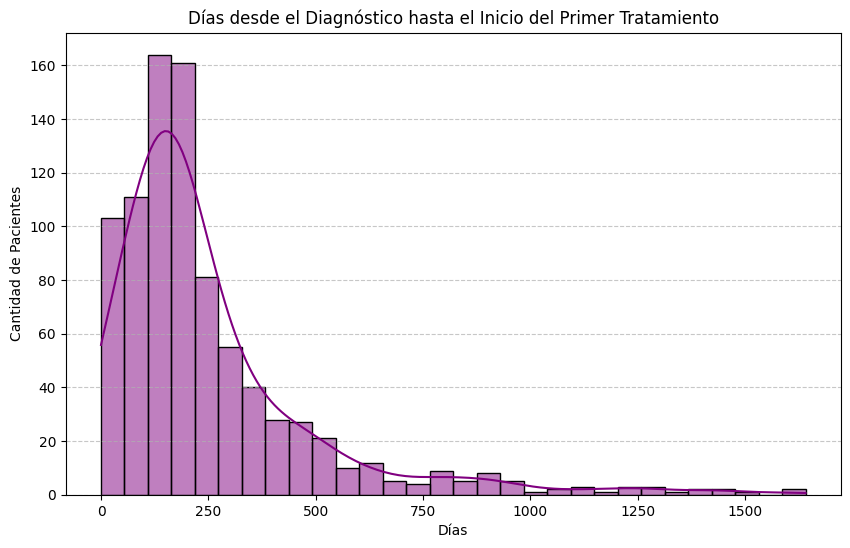

count     870.000000
mean      252.203448
std       247.576699
min         0.000000
25%       111.250000
50%       181.000000
75%       299.750000
max      1641.000000
Name: DIAS_HASTA_INICIO_TRATAMIENTO, dtype: float64

In [38]:
# Visualización de la distribución de los días hasta el inicio del tratamiento
plt.figure(figsize=(10, 6))
sns.histplot(df['DIAS_HASTA_INICIO_TRATAMIENTO'].dropna(), kde=True, bins=30, color='purple')
plt.title('Días desde el Diagnóstico hasta el Inicio del Primer Tratamiento')
plt.xlabel('Días')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estadísticas básicas de los días hasta el inicio del tratamiento
df['DIAS_HASTA_INICIO_TRATAMIENTO'].describe()

In [39]:
# Verificar la existencia de valores nulos
print("--- Verificar la existencia de valores nulos ---")
print(df.isnull().sum())
#comentario

--- Verificar la existencia de valores nulos ---
IDPACIENTE                         0
IDTUMOR                            0
SEXO                               0
FEC_NACIMIENTO                     0
PREVISION                          0
                                ... 
OBSERVACION_TRATAMIENTO_7        870
OBSERVACION_TRATAMIENTO_8        870
OBSERVACION_TRATAMIENTO_9        870
OBSERVACION_TRATAMIENTO_10       870
DIAS_HASTA_INICIO_TRATAMIENTO      0
Length: 121, dtype: int64


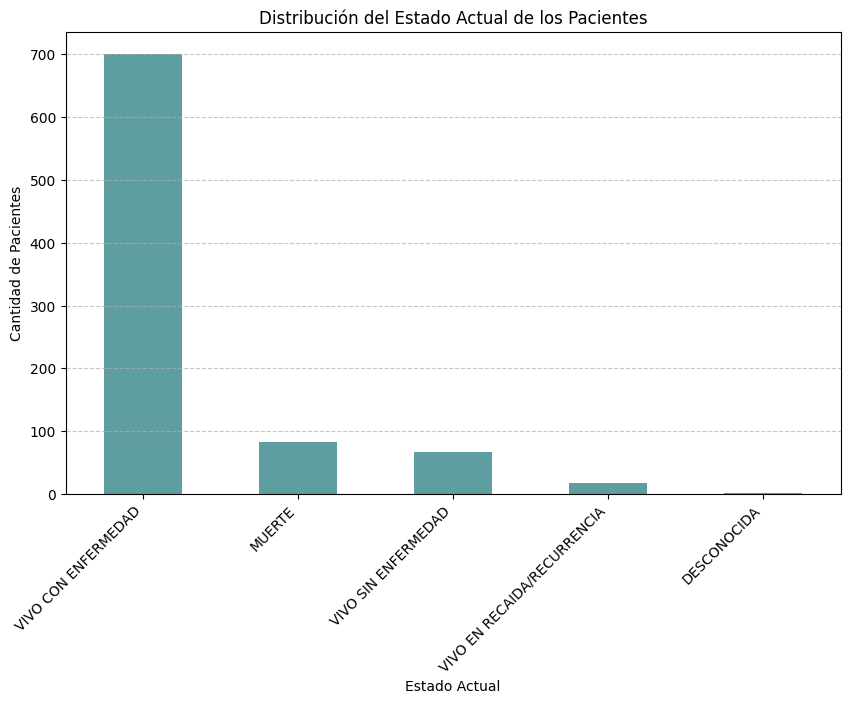

In [40]:
# Análisis del Estado Actual de los pacientes
estado_actual = df['ESTADO_ACTUAL'].value_counts()

# Visualización del Estado Actual
plt.figure(figsize=(10, 6))
estado_actual.plot(kind='bar', color='cadetblue')
plt.title('Distribución del Estado Actual de los Pacientes')
plt.xlabel('Estado Actual')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [41]:
# Resumen estadístico de los datos
df.describe().T

,count,mean,min,25%,50%,75%,max,std
IDPACIENTE,870.0,27910.850575,1646.0,24087.5,28002.5,31985.25,37144.0,5536.667455
IDTUMOR,870.0,25382.272414,16920.0,22280.25,25178.5,27650.75,33121.0,3749.857476
FEC_NACIMIENTO,870,1950-05-14 01:36:00,1921-07-20 00:00:00,1944-12-21 18:00:00,1950-01-11 12:00:00,1955-09-22 00:00:00,1979-05-13 00:00:00,NaN
FECHA_CANCER_PREVIO_1,18,2011-09-21 22:40:00,1995-01-01 00:00:00,2006-10-02 00:00:00,2014-07-02 12:00:00,2018-07-02 12:00:00,2022-01-01 00:00:00,NaN
FECHA_CANCER_PREVIO_2,1,1979-01-01 00:00:00,1979-01-01 00:00:00,1979-01-01 00:00:00,1979-01-01 00:00:00,1979-01-01 00:00:00,1979-01-01 00:00:00,NaN
FECHA_COMITE,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
FEC_INGRESO_CASO,870,2020-12-10 15:25:14.482758912,2011-10-26 00:00:00,2019-12-10 06:00:00,2021-02-20 12:00:00,2021-11-18 00:00:00,2023-11-08 00:00:00,NaN
FEC_DIAGNO,870,2020-07-27 18:22:20.689655040,2019-01-02 00:00:00,2019-09-13 12:00:00,2020-08-08 00:00:00,2021-06-15 00:00:00,2021-12-31 00:00:00,NaN
INTERVALO_INGRESO_DIAGNO,870.0,-135.877011,-1607.0,-211.0,-108.0,6.75,3060.0,289.603049
FEC_TOM_MUESTRA,870,2020-07-22 02:02:28.965517312,2018-11-23 00:00:00,2019-09-04 06:00:00,2020-08-01 00:00:00,2021-06-15 00:00:00,2022-10-15 00:00:00,NaN


In [130]:
# Guardar el DataFrame filtrado especificando el delimitador, sin índice y con codificación UTF-8
#df.to_csv('../data/processed/df_cancer_prostata_processed.csv', index=False, encoding='utf-8')


In [42]:
df['ESTADO_ACTUAL'].value_counts()

ESTADO_ACTUAL
VIVO CON ENFERMEDAD            701
MUERTE                          83
VIVO SIN ENFERMEDAD             67
VIVO EN RECAIDA/RECURRENCIA     17
DESCONOCIDA                      2
Name: count, dtype: int64

In [43]:
# Definir los estados para los cuales 'SOBREVIVE' será 1
estados_sobrevive = ['VIVO CON ENFERMEDAD', 'VIVO SIN ENFERMEDAD', 'VIVO EN RECAIDA/RECURRENCIA']

# Crear la columna 'SOBREVIVE' basada en la condición dada
df['SOBREVIVE'] = df['ESTADO_ACTUAL'].apply(lambda x: 1 if x in estados_sobrevive else 0 if x == 'MUERTE' else np.nan)

# Verificar los primeros registros para confirmar la creación y asignación correcta en la nueva columna
df[['ESTADO_ACTUAL', 'SOBREVIVE']].head()


,ESTADO_ACTUAL,SOBREVIVE
1,VIVO CON ENFERMEDAD,1.0
2,VIVO SIN ENFERMEDAD,1.0
3,VIVO CON ENFERMEDAD,1.0
4,VIVO CON ENFERMEDAD,1.0
5,MUERTE,0.0


In [60]:
#df['SOBREVIVE'].value_counts()

df = df.dropna(subset=['SOBREVIVE'])
#df['SOBREVIVE'] = df['SOBREVIVE'].astype('int64')
#df['SOBREVIVE'].value_counts()


In [61]:
df['SOBREVIVE'].isnull().sum()

0

In [62]:
df['SOBREVIVE'] = df['SOBREVIVE'].astype('int64')

# **1.- Determinación de variables clínicas y biomédicas más relevantes**



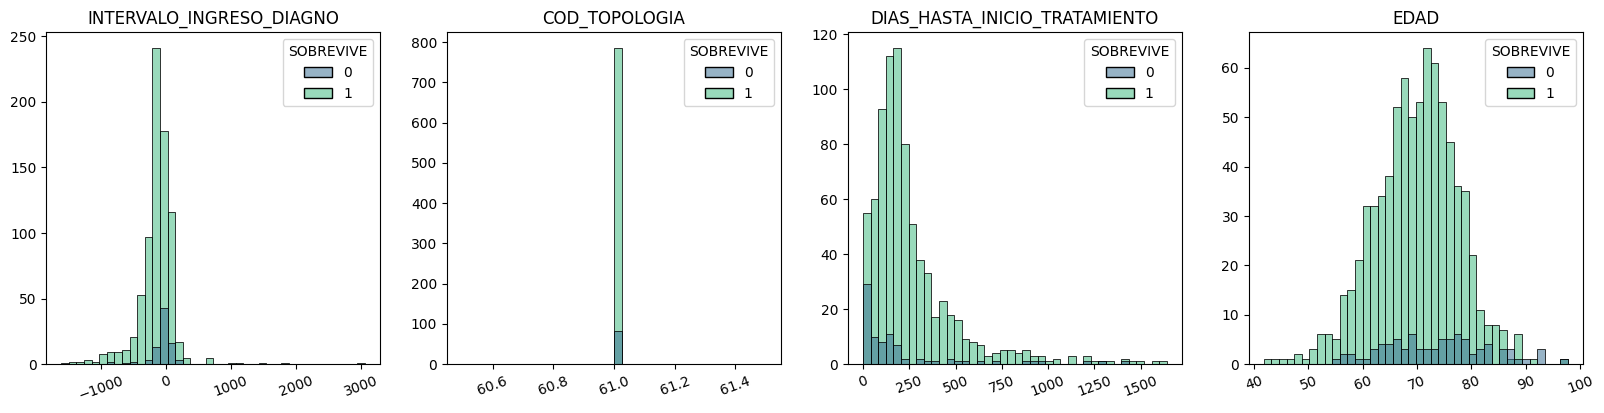

In [70]:

# Calcular la edad en días
df['EDAD_EN_DIAS'] = (df['FEC_DIAGNO'] - df['FEC_NACIMIENTO']).dt.days

# Calcular la edad en años
df['EDAD'] = df['EDAD_EN_DIAS'] / 365.25

# Eliminar la columna de edad en días si no es necesaria
df = df.drop(columns=['EDAD_EN_DIAS'])

# Seleccionar las columnas deseadas
columnas_deseadas = ['INTERVALO_INGRESO_DIAGNO', 'COD_TOPOLOGIA','DIAS_HASTA_INICIO_TRATAMIENTO','EDAD']
df_nuevo = df[columnas_deseadas]
fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_nuevo.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df[n], hue = df['SOBREVIVE'], palette = "viridis", bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

<class 'pandas.core.series.Series'>
Index: 868 entries, 1 to 993
Series name: SOBREVIVE
Non-Null Count  Dtype
--------------  -----
868 non-null    int64
dtypes: int64(1)
memory usage: 13.6 KB
SOBREVIVE
1    785
0     83
Name: count, dtype: int64


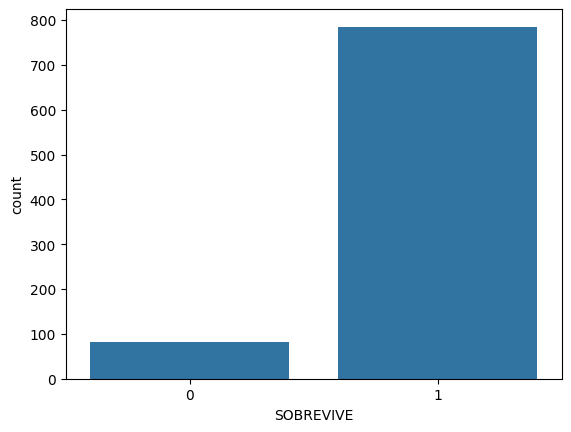

In [63]:
df['SOBREVIVE'].info()

# Gráfico de resultado de la variable target (0: No Hipertensión; 1: Hipertensión)
import seaborn as sns
print(df['SOBREVIVE'].value_counts())
_ = sns.countplot(x='SOBREVIVE', data=df)

In [76]:
df[['IDTUMOR', 'TNM_1']].head()


,IDTUMOR,TNM_1
1,20825,C T2A N0 M0
2,18713,P T3 N0 M0
3,18013,NaN
4,16920,P T2C N0 M0
5,19611,C T3 N1 M1


In [77]:
# Split the values in 'TNM_1' column by space and create new columns
df[['Tipo_Tumor', 'T', 'N', 'M']] = df['TNM_1'].str.split(' ', expand=True)




    Tipo_Tumor    T    N    M
1            C  T2A   N0   M0
2            P   T3   N0   M0
3          NaN  NaN  NaN  NaN
4            P  T2C   N0   M0
5            C   T3   N1   M1
..         ...  ...  ...  ...
989        NaN  NaN  NaN  NaN
990        NaN  NaN  NaN  NaN
991        NaN  NaN  NaN  NaN
992          C   TX   NX   M1
993          C  T3B   N0   M0

[868 rows x 4 columns]


In [78]:
# Print the updated dataframe
print(df[['TNM_1','Tipo_Tumor', 'T', 'N', 'M']])

           TNM_1 Tipo_Tumor    T    N    M
1    C T2A N0 M0          C  T2A   N0   M0
2     P T3 N0 M0          P   T3   N0   M0
3            NaN        NaN  NaN  NaN  NaN
4    P T2C N0 M0          P  T2C   N0   M0
5     C T3 N1 M1          C   T3   N1   M1
..           ...        ...  ...  ...  ...
989          NaN        NaN  NaN  NaN  NaN
990          NaN        NaN  NaN  NaN  NaN
991          NaN        NaN  NaN  NaN  NaN
992   C TX NX M1          C   TX   NX   M1
993  C T3B N0 M0          C  T3B   N0   M0

[868 rows x 5 columns]
